## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Import packages

In [1]:
import pandas as pd
import numpy as np
import itertools 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel('data/CCPP/Folds5x2_pp.xlsx',sheet_name='Sheet1')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [3]:
rows = df.shape[0]
column = df.shape[1]
print("Number of rows: " + str(rows))
print("Number of columns: " + str(column))

Number of rows: 9568
Number of columns: 5


The columns of the dataset which comprises of the independent variables namely :- Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH), their effects on the the dependent variable Net hourly electrical Energy Output (PE).
The Rows represents the records for each term.

#### ii. pairwise scatterplots of all the varianbles

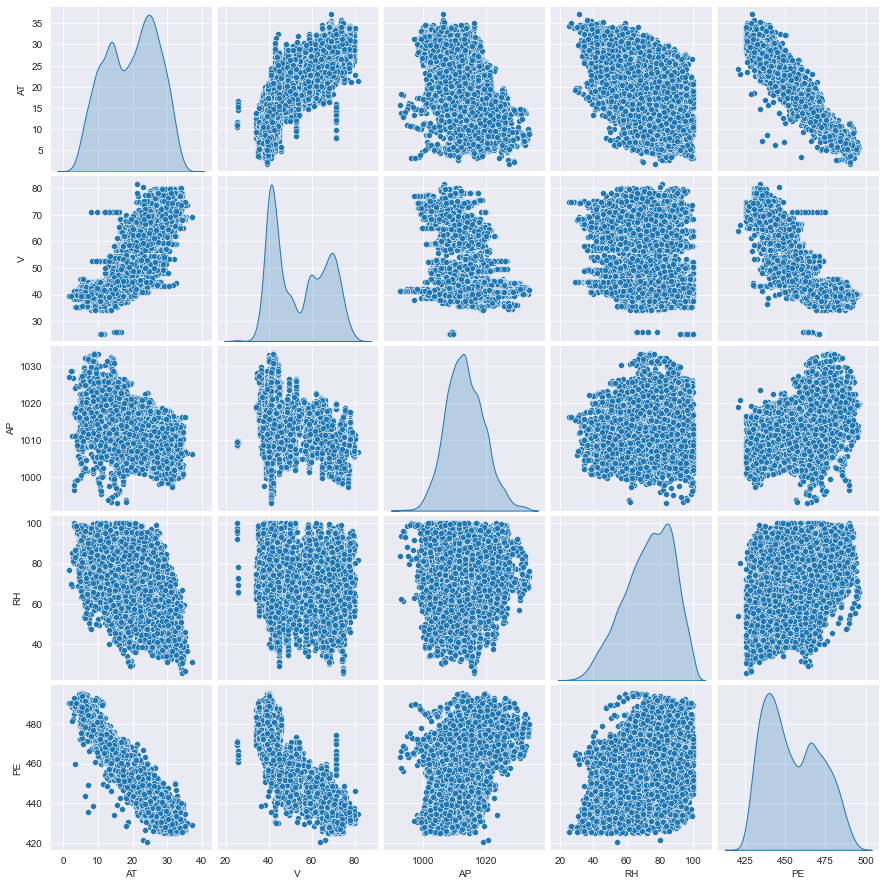

In [4]:
sns.set_style('darkgrid')
sns.pairplot(df,diag_kind='kde');

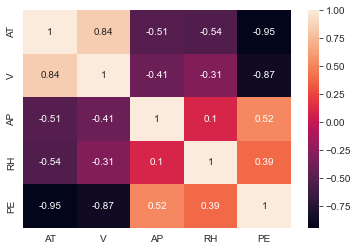

In [5]:
sns.heatmap(df.corr(), annot=True);

There is negative correlation between Ambient Temperature (AT) and Electrical Output (PE) and between Exhaust Vacuum (V) and Electrical Output (PE).

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
def describe_properties(df):
    df_new = df.describe()
    df_new.loc["Range"] = df_new.loc['max'] - df_new.loc['min']
    df_new.loc["IQR"] = df_new.loc['75%'] - df_new.loc['25%']
    return df_new
df_answer=describe_properties(df)
df_answer=df_answer.drop(['count', 'std','min','max'])
print(df_answer)

              AT          V           AP         RH          PE
mean   19.651231  54.305804  1013.259078  73.308978  454.365009
25%    13.510000  41.740000  1009.100000  63.327500  439.750000
50%    20.345000  52.080000  1012.940000  74.975000  451.550000
75%    25.720000  66.540000  1017.260000  84.830000  468.430000
Range  35.300000  56.200000    40.410000  74.600000   75.500000
IQR    12.210000  24.800000     8.160000  21.502500   28.680000


### (c) Simple Linear Regression

### 1. Ambient Temperature with Energy Output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:10   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

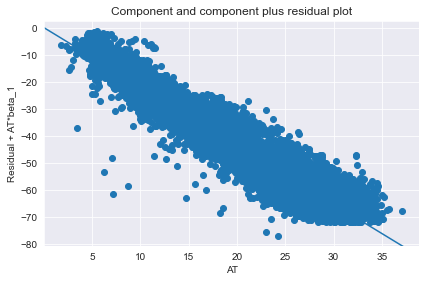

In [7]:
df_temperature = df[['AT','PE']].copy()
PE = df_temperature["PE"]
AT = df_temperature["AT"]
model1 = smf.ols(formula='PE ~ AT', data = df_temperature).fit()
print(model1.summary())

ls_AT = model1.params[1]
print(ls_AT)

fig = sm.graphics.plot_ccpr(model1,'AT')
fig.tight_layout(pad=1.0)

#### Since the P-value is very less i.e 0.000, and the F-score is very large i.e 8.510e+04, the null hypothesis can be rejected.

### 2. Exhaust vaccum vs Electrical output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:10   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

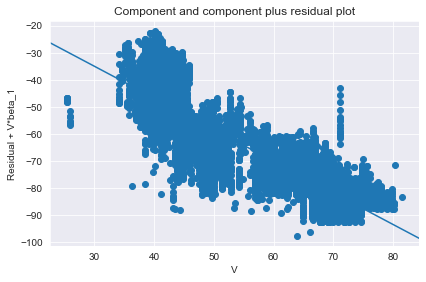

In [8]:
df_vaccumm = df[['V','PE']].copy()
PE = df_vaccumm["PE"]
V = df_vaccumm["V"]
model2 = smf.ols(formula='PE ~ V', data = df_vaccumm).fit()
print(model2.summary())

ls_V = model2.params[1]
print(ls_V)

fig = sm.graphics.plot_ccpr(model2,'V')
fig.tight_layout(pad=1.0)

#### Since the P-value is very less i.e 0.000, and the F-score is very large i.e 2.972e+04, the null hypothesis can be rejected.

### 3. Ambient Pressure vs Electrical Output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:11   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

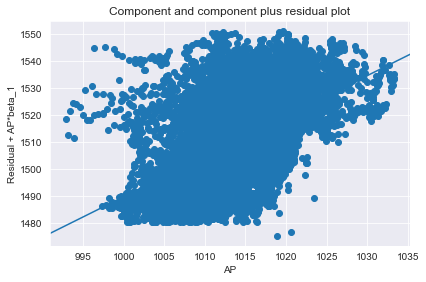

In [9]:
df_pressure = df[['AP','PE']].copy()
PE = df_pressure["PE"]
AP = df_pressure["AP"]
model3 = smf.ols(formula='PE ~ AP', data = df_pressure).fit()
print(model3.summary())

ls_AP = model3.params[1]
print(ls_AP)

fig = sm.graphics.plot_ccpr(model3,'AP')
fig.tight_layout(pad=1.0)

#### Since the P-value is very less i.e 0.000, and the F-score is very large i.e 3516, the null hypothesis can be rejected.

### 4. Relative Humidity vs Electrical Output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:11   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

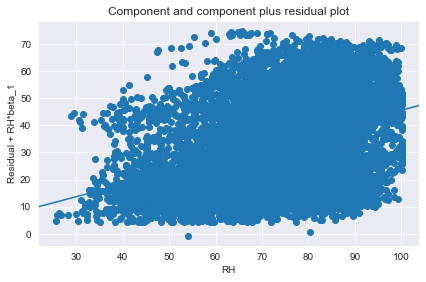

In [10]:
df_humidity = df[['RH','PE']].copy()
PE = df_humidity["PE"]
RH = df_humidity["RH"]
model4 = smf.ols(formula='PE ~ RH', data = df_humidity).fit()
print(model4.summary())

ls_RH = model4.params[1]
print(ls_RH)

fig = sm.graphics.plot_ccpr(model4,'RH')
fig.tight_layout(pad=1.0)

#### Since the P-value is very less i.e 0.000, and the F-score is very large i.e 1714, the null hypothesis can be rejected.

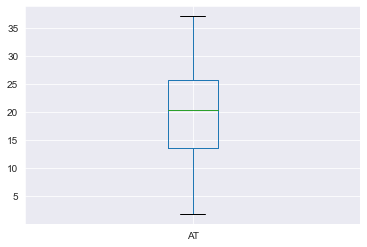

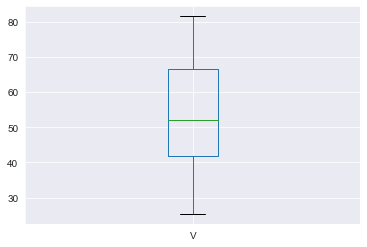

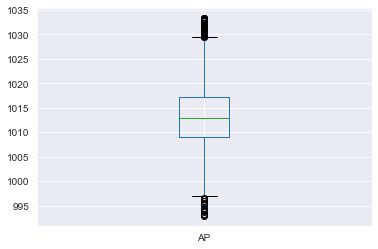

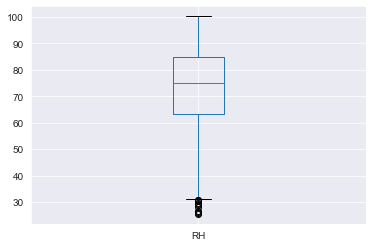

In [11]:
df_new = df.drop(columns=["PE"])
for coloumn in df_new:
    plt.figure()
    df.boxplot([coloumn])

#### There are outliers for the Ambient Pressure and Relative Humdity variables.

### (d) Multiple Regression

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:11   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

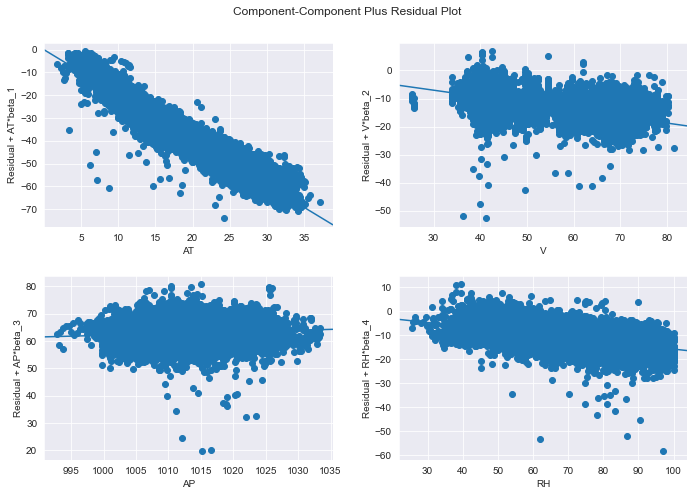

In [12]:
y = df["PE"]
x = df[['AT','V','AP','RH']]

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
print(model.summary())

ls_mul1 = model.params[1]
ls_mul2 = model.params[2]
ls_mul3 = model.params[3]
ls_mul4 = model.params[4]

plt.rc("figure", figsize=(10, 10))
fig = sm.graphics.plot_ccpr_grid(model)
fig.tight_layout(pad=2.0)
plt.show()

#### Since the p-values for all the predictors is very less i.e 0.000, we can reject the null hypothesis for all the predictors.

### (e) 1c Compare to 1d

[-2.1713199585178047, -1.1681351265557107, 1.4898716733991129, 0.45565010226298014]
[-1.9775131066353864, -0.2339164225825025, 0.06208294378084911, -0.15805410291641003]


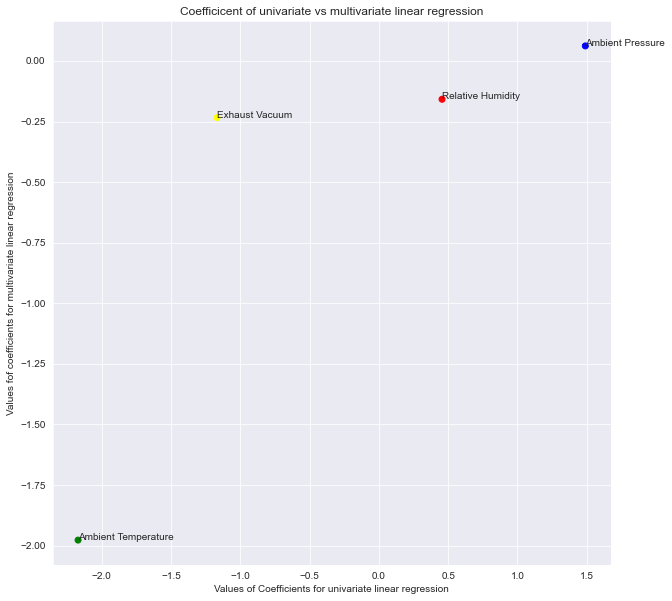

<Figure size 1080x1440 with 0 Axes>

In [13]:
lis = [ls_AT, ls_V, ls_AP, ls_RH]
print(lis)

lis_mul = [ls_mul1, ls_mul2, ls_mul3, ls_mul4]
print(lis_mul)

annotations = ["Ambient Temperature","Exhaust Vacuum","Ambient Pressure","Relative Humidity"]

plt.scatter(x=lis, y=lis_mul, color=["green","yellow","blue","red"])


for i, label in enumerate(annotations):
    plt.annotate(label, (lis[i], lis_mul[i]))
    
plt.xlabel("Values of Coefficients for univariate linear regression");
plt.ylabel("Values fof coefficients for multivariate linear regression");
plt.title("Coefficicent of univariate vs multivariate linear regression");
plt.figure(figsize=(15, 20));

In 1.c) The R2 squared term for 
- AT is 0.899, the linear model fits well.
- V is 0.757, model is decent fit.
- AP is 0.269, compared to others its a poor fit.
- RH is 0.152compared to others its a poor fit.

whereas in 1.d) The R2squared term for multiple regrression is 0.929

Therefore, the value is a high indicating that the model fits with the regrression line.

### (f) Nonlinear Association

#### 1. Ambient Temperature

In [14]:
poly = PolynomialFeatures(degree = 3)
x_poly = df_temperature["AT"].values.reshape(-1,1)

x_poly_AT = poly.fit_transform(x_poly)

AT_poly = sm.OLS(y,x_poly_AT).fit()
print(AT_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:11   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

#### 2. Exhaust vacumm

In [15]:
poly = PolynomialFeatures(degree = 3)
x_poly = df_vaccumm["V"].values.reshape(-1,1)

x_poly_V = poly.fit_transform(x_poly)

V_poly=sm.OLS(y,x_poly_V).fit()
print(V_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:11   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

#### 3. Ambient Pressure

In [16]:
poly = PolynomialFeatures(degree = 3)
x_poly=df_pressure["AP"].values.reshape(-1,1)

x_poly_AP=poly.fit_transform(x_poly)

AP_poly=sm.OLS(y,x_poly_AP).fit()
print(AP_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:11   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

#### 4. Relative Humidity

In [17]:
poly = PolynomialFeatures(degree = 3)
x_poly=df_humidity["RH"].values.reshape(-1,1)

x_poly_RH = poly.fit_transform(x_poly)

RH_poly_stat_model=sm.OLS(y,x_poly_RH).fit()
print(RH_poly_stat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:11   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

Yes there is a non-linear association between the predictors and the response, since there is significant term in the Cube term for Exhaust vacuum.

### (g) Interactions of Predictors

In [18]:
X_interac= df.drop(columns=['PE']) 
X_interac= X_interac.reset_index(drop=True)


poly = PolynomialFeatures(interaction_only=True)
af=poly.fit_transform(X_interac)
pair_interac_heads= poly.get_feature_names_out()
for i,j in enumerate(pair_interac_heads[5:]):
        X_interac[j]=af[:,i+5]
Y=df["PE"]   


interac_poly_stat_model=sm.OLS(Y,X_interac).fit()
print(interac_poly_stat_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.057e+07
Date:                Fri, 10 Feb 2023   Prob (F-statistic):                        0.00
Time:                        22:25:12   Log-Likelihood:                         -27586.
No. Observations:                9568   AIC:                                  5.519e+04
Df Residuals:                    9558   BIC:                                  5.526e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### (h) Improvement

In [19]:
Y = df.iloc[:,[-1]]
Y= Y.reset_index(drop=True)

X= df.drop(columns=['PE']) 
X= X.reset_index(drop=True)
X=sm.add_constant(x)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=40)
single_reg= LinearRegression().fit(X_train,Y_train)
single_pred_test= single_reg.predict(X_test)
single_pred_train= single_reg.predict(X_train)

MSE_single_train= metrics.mean_squared_error(Y_train, single_pred_train)
MSE_single_test= metrics.mean_squared_error(Y_test,single_pred_test)
print("The mean square error for train data is:", MSE_single_train)
print("The mean square error for test data is:",MSE_single_test)

The mean square error for train data is: 20.42276330249501
The mean square error for test data is: 21.605882405224364


In [20]:
d_combine= pd.DataFrame()
d_combine["V*V"]=df["V"]**2
d_combine["AT*AT"]=df["AT"]**2
d_combine["AP*AP"]= df["AP"]**2
d_combine["RH*Rh"]=df["RH"]**2
d_combine["AT*V"]=df["AT"]*df["V"]
d_combine["AT*AP"]=df["AT"]*df["AP"]
d_combine["AT*RH"]=df["AT"]*df["RH"]
d_combine["V*AP"]=df["V"]*df["AP"]
d_combine["V*RH"]=df["V"]*df["RH"]
d_combine["AP*RH"]=df["AP"]*df["RH"]


d_combined=pd.concat([df_new,d_combine],axis=1)
d_combined

,AT,V,AP,RH,V*V,AT*AT,AP*AP,RH*Rh,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH
0,14.96,41.76,1024.07,73.17,1743.8976,223.8016,1.048719e+06,5353.8489,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,25.18,62.96,1020.04,59.08,3963.9616,634.0324,1.040482e+06,3490.4464,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,5.11,39.40,1012.16,92.14,1552.3600,26.1121,1.024468e+06,8489.7796,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,20.86,57.32,1010.24,76.64,3285.5824,435.1396,1.020585e+06,5873.6896,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,10.82,37.50,1009.23,96.62,1406.2500,117.0724,1.018545e+06,9335.4244,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,2469.0961,277.2225,1.028216e+06,8281.0000,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100
9564,13.19,39.18,1023.67,66.78,1535.0724,173.9761,1.047900e+06,4459.5684,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826
9565,31.32,74.33,1012.92,36.48,5524.9489,980.9424,1.026007e+06,1330.7904,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216
9566,24.48,69.45,1013.86,62.39,4823.3025,599.2704,1.027912e+06,3892.5121,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254


In [21]:
X_train_combine, X_test_combine, Y_train_combine, Y_test_combine = train_test_split(d_combined, df["PE"], test_size=0.30,random_state=40)
single_reg= LinearRegression().fit(X_train_combine,Y_train_combine)
single_pred_test_combine= single_reg.predict(X_test_combine)
single_pred_train_combine= single_reg.predict(X_train_combine)

MSE_single_train_combine= metrics.mean_squared_error(Y_train_combine, single_pred_train_combine)
MSE_single_test_combine= metrics.mean_squared_error(Y_test_combine,single_pred_test_combine)
print("The mean square error for combined train data is:", MSE_single_train_combine)
print("The mean square error for combined test data is:",MSE_single_test_combine)

combined_stat_model=sm.OLS(Y_train_combine,X_train_combine).fit()
print(combined_stat_model.summary())

The mean square error for combined train data is: 17.818371788915545
The mean square error for combined test data is: 18.82103815826167
                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.520e+06
Date:                Fri, 10 Feb 2023   Prob (F-statistic):                        0.00
Time:                        22:25:12   Log-Likelihood:                         -19156.
No. Observations:                6697   AIC:                                  3.834e+04
Df Residuals:                    6683   BIC:                                  3.843e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                   

In [22]:
df_last=d_combined.drop(["V*V","V*AP","V*RH"],axis=1)

X_train_final, X_test_final, Y_train_final, Y_test_final = train_test_split(df_last, df["PE"], test_size=0.30,random_state=40)
fnl_reg= LinearRegression().fit(X_train_final,Y_train_final)
fnl_pred_test= fnl_reg.predict(X_test_final)
fnl_pred_train= fnl_reg.predict(X_train_final)

MSE_fnl_train= metrics.mean_squared_error(Y_train_final, fnl_pred_train)
MSE_fnl_test= metrics.mean_squared_error(Y_test_final,fnl_pred_test)
print("The mean square error for train data is:", MSE_fnl_train)
print("The mean square error for test data is:",MSE_fnl_test)

fnl_stat_model=sm.OLS(Y_train_final,X_train_final).fit()
print(fnl_stat_model.summary())

The mean square error for train data is: 17.829280848055223
The mean square error for test data is: 18.82231079772444
                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.026e+06
Date:                Fri, 10 Feb 2023   Prob (F-statistic):                        0.00
Time:                        22:25:12   Log-Likelihood:                         -19157.
No. Observations:                6697   AIC:                                  3.834e+04
Df Residuals:                    6686   BIC:                                  3.841e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
  

### (i) KNN

In [23]:
Y=df.iloc[:,[-1]]
Y= Y.reset_index(drop=True)

X= df.drop(columns=['PE']) 
X= X.reset_index(drop=True)
 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30,random_state=42)

In [24]:
test_error=[]
train_error=[]

k=[x for x in range(1,101)]
mse_test_raw=[]

 
for i in k:
    model_fit=KNeighborsRegressor(n_neighbors=i)
    model_fit.fit(X_train,Y_train)
    
    train_score=1-model_fit.score(X_train,Y_train)
    train_error.append(train_score)
    
    test_score=1-model_fit.score(X_test,Y_test)
    test_error.append(test_score)

min_test=min(test_error)

min_index=test_error.index(min_test)
min_train=train_error[min_index]
Best_k= k[min_index]
print("Best k: " + str(Best_k))
print("Minimum test: " + str(min_test))
print("Minimum train: " + str(min_train))

model_knn_pred_test=model_fit.predict(X_test)
mse_test_raw.append(mean_squared_error(Y_test,model_knn_pred_test))

min_error_mse_test=min(mse_test_raw)

print(min_error_mse_test)

Best k: 5
Minimum test: 0.05364592369711796
Minimum train: 0.0365005419374449
21.5083114550923


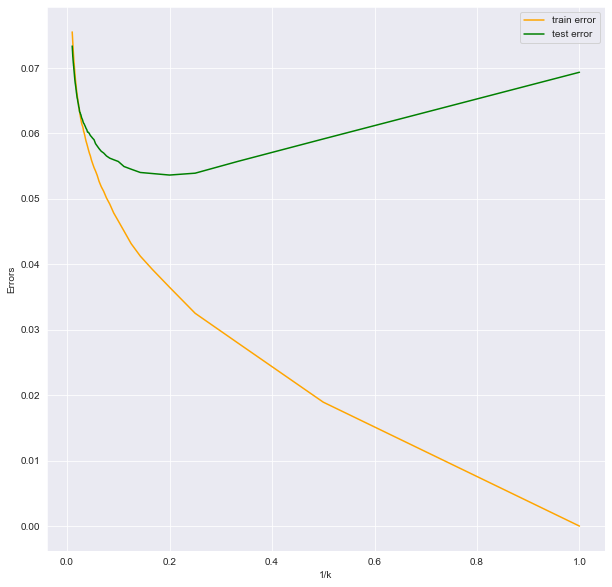

In [25]:
k1=[1/x for x in k]

plt.plot((k1),train_error,color='orange',label="train error")
plt.plot((k1),test_error,color='green',label="test error")
plt.xlabel("1/k")
plt.ylabel("Errors")
plt.legend();

In [26]:
Y_norm=df.iloc[:,[-1]]
Y_norm= Y_norm.reset_index(drop=True)

X= df.drop(columns=['PE']) 
X_norm = preprocessing.MinMaxScaler()
X_normal=X_norm.fit_transform(X)

 
X_train, X_test_norm, Y_train, Y_test_norm = train_test_split(X_normal, Y_norm, test_size=0.30,random_state=42)
test_error_norm=[]
train_error_norm=[]

k_norm=[x for x in range(1,101)]
mse_test_norm=[]

 
for i in k_norm:
    model_fit_norm=KNeighborsRegressor(n_neighbors=i)
    model_fit_norm.fit(X_train,Y_train)
    
    train_score_norm=1-model_fit_norm.score(X_train,Y_train)
    train_error_norm.append(train_score_norm)
    
    test_score_norm=1-model_fit_norm.score(X_test_norm,Y_test_norm)
    test_error_norm.append(test_score_norm)    
    
    
min_test_norm=min(test_error_norm)
min_index_norm=test_error_norm.index(min_test_norm)
Best_k_norm= k_norm[min_index_norm]
min_train_norm=train_error_norm[min_index_norm]
print(Best_k_norm)

model_knn_pred_test_norm=model_fit.predict(X_test_norm)
mse_test_norm.append(mean_squared_error(Y_test_norm,model_knn_pred_test_norm))

min_mse_test_norm=min(mse_test_norm)

print("The mse is :",min_mse_test_norm)

4
The mse is : 301.87793253919546


/Users/aakritinag/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


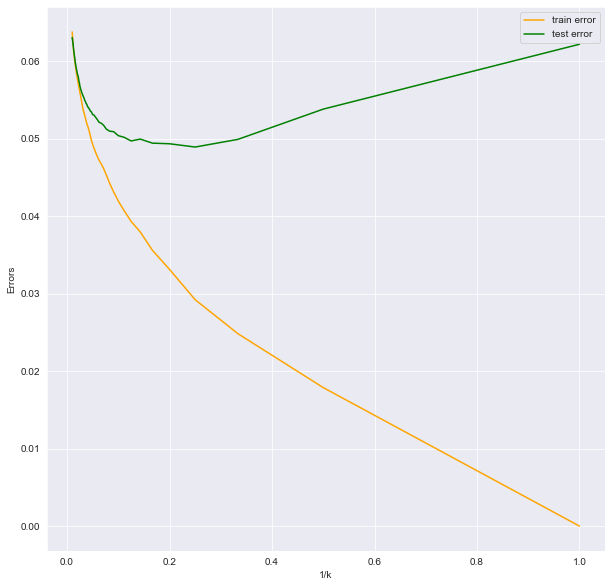

In [27]:
k1_norm=[1/x for x in k_norm]

plt.plot((k1_norm),train_error_norm,color='orange',label="train error")
plt.plot((k1_norm),test_error_norm,color='green',label="test error")
plt.xlabel("1/k")
plt.ylabel("Errors")
plt.legend()

### (j ) Compare KNN and Linear

In [28]:
test_error_data=[["Linear Regression simple",MSE_single_test],["Linear Regression with combined terms",MSE_single_test_combine],["Linear Regression removing insignificant terms",MSE_fnl_test],["KNN regression raw",min_error_mse_test],["KNN regression normalized",min_mse_test_norm]]
error_table=pd.DataFrame(test_error_data,columns=["Parameters","Minimum Errors"])
error_table

,Parameters,Minimum Errors
0,Linear Regression simple,21.605882
1,Linear Regression with combined terms,18.821038
2,Linear Regression removing insignificant terms,18.822311
3,KNN regression raw,21.508311
4,KNN regression normalized,301.877933


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

The performance of a flexible statistical learning method should be better. 
Since the number of predictors 'p' is small, the computational cost of using a more flexible method is not as much of an issue. 
A more flexible approach will fit the data closer and with the large sample size 'n' a better fit than an inflexible approach
would be obtained.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

The performance of a flexible statistical learning method would be worse. A flexible method with large predictors 'p'
would overfit the small number of observations 'n'.

### (c) The relationship between the predictors and response is highly non-linear.

The performance of a flexible statistical learning method would be better. With more degrees of freedom, a flexible model would obtain a better fit.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

The performance of a flexible statistical learning method will be worse. Flexible methods will fit to the noise in the error terms and thus increase the variance.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

Given the formula for Euclidian distance. Thus calculating for each test point and observation, 
- d1 = 3
- d2 = 2
- d3 = 10^0.5 = 3.2
- d4 = 5^0.5 = 2.2
- d5 = 2^0.5 = 1.4
- d6 = 3^0.5 = 1.7

### (b) What is our prediction with K = 1? Why?

Our prediction is green since the single nearest neighbor is obs 5 for K=1, with Y = green.

### (c) What is our prediction with K = 3? Why?

Our prediction is red, since 3-nearest neighbors are obs 5, 6, 2, with corresponding Y = green, red,
red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

Small. A small K would be flexible for a non-linear decision boundary, whereas a large K would try
to fit a more linear boundary because it takes more points into consideration.